In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [10]:
train_title_vecs = np.load('train_title_vecs.npy')
train_body_vecs = np.load('train_body_vecs.npy')
test_title_vecs = np.load('test_title_vecs.npy')
test_body_vecs = np.load('test_body_vecs.npy')
train_label_vecs = np.load('train_labels.npy')
test_label_vecs = np.load('test_labels.npy')

train_title_df = pd.DataFrame(train_title_vecs)
train_body_df = pd.DataFrame(train_body_vecs)
test_title_df = pd.DataFrame(test_title_vecs)
test_body_df = pd.DataFrame(test_body_vecs)
train_label_df = pd.DataFrame(train_label_vecs)
test_label_df = pd.DataFrame(test_label_vecs)

train_df = pd.concat([train_title_df, train_body_df], axis = 1)
test_df = pd.concat([test_title_df, test_body_df], axis = 1)

print(train_df.shape)
print(test_df.shape)

(1871144, 120)
(330203, 120)


In [12]:
dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_leaf=1)
dt_clf.fit(train_df.head(50), train_label_df.head(50))

pred_train = dt_clf.predict(train_df.head(50))
pred_test = dt_clf.predict(test_df.head(50))

train_accuracy = accuracy_score(train_label_df.head(50), pred_train)
test_accuracy = accuracy_score(test_label_df.head(50), pred_test)

# dTree_filename = 'dTree.pkl'
# # Open the file to save as pkl file
# decision_tree_model_pkl = open(dTree_filename, 'wb')
# pickle.dump(dt_clf, decision_tree_model_pkl)
# # Close the pickle instances
# decision_tree_model_pkl.close()
# model_dict['dTree'] = dt_clf
# print("Model Saved")

print('Train Accuracy -> ', train_accuracy*100)
print('Test Accuracy -> ', test_accuracy*100)

Train Accuracy ->  100.0
Test Accuracy ->  52.0


Train Accuracy ->  100.0
Test Accuracy ->  30.0


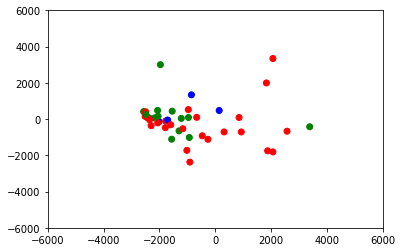

In [30]:
pca = PCA(n_components = 2)
pca.fit(train_df.head(50))

xs = pca.transform(train_df.head(50))[:,0]
ys = pca.transform(train_df.head(50))[:,1]

ss = pca.transform(test_df.head(50))[:,0]
ss = pca.transform(test_df.head(50))[:,1]

data_tuples = list(zip(xs,ys))
data_tupl = list(zip(ss,ss))


frame = (train_label_df.iloc[:, 0]).head(50)
color_list = [{0:"r",1:"g",2:"b"}[x] for x in frame]
plt.scatter(xs, ys, color=color_list)
plt.xlim(-6000, 6000)
plt.ylim(-6000, 6000)

data = pd.DataFrame(data_tuples)
dt_clff = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_leaf=1)
dt_clff.fit(data, train_label_df.head(50))

pred_trainn = dt_clff.predict(data)
pred_testt = dt_clff.predict(pd.DataFrame(data_tupl))

train_accuracyy = accuracy_score(train_label_df.head(50), pred_trainn)
test_accuracyy = accuracy_score(test_label_df.head(50), pred_testt)

# dTree_filename = 'dTree.pkl'
# # Open the file to save as pkl file
# decision_tree_model_pkl = open(dTree_filename, 'wb')
# pickle.dump(dt_clf, decision_tree_model_pkl)
# # Close the pickle instances
# decision_tree_model_pkl.close()
# model_dict['dTree'] = dt_clf
# print("Model Saved")

print('Train Accuracy -> ', train_accuracyy*100)
print('Test Accuracy -> ', test_accuracyy*100)